In [42]:
# pip install --exists-action=i scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from zipfile import ZipFile
import os

zf = ZipFile('data_MNIST.zip', 'r')
zf.extractall()
zf.close()

files = os.listdir('data')
print(files)

['test_images.txt', 'test_labels.txt', 'train_images.txt', 'train_labels.txt']


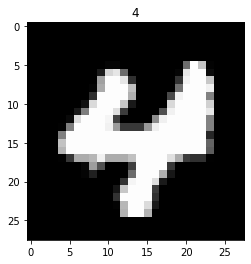

In [15]:
import numpy as np
import matplotlib.pyplot as plt

root = 'data/'
train_images = np.loadtxt(root + 'train_images.txt') # incarcam imaginile
train_labels = np.loadtxt(root + 'train_labels.txt', 'int') # incarcam etichetele avand
                                                     # tipul de date int
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28)) # redimensionăm vectorul de 1 x 784 la 28 x 28.
plt.title(train_labels[0])
plt.imshow(image.astype(np.uint8), cmap = 'gray')
plt.show()

In [8]:
"""Deoarece datele noastre (valorile pixelilor) sunt valori continue, va trebui sa le
transformăm în valori discrete cu ajutorul unei histograme. Vom stabili numărul de intervale
la care vom împărți lungimea intervalului valorilor continue, apoi vom asigna fiecărei valori
continue indicele intervalul corespunzător."""
bins = np.linspace(start = 0, stop = 255, num = num_bins) # returneaza intervalele
x_to_bins = np.digitize(x, bins) # returneaza pentru fiecare element intervalul
                                 # corespunzator
                                 # Atentie! In cazul nostru indexarea elementelor va
                                 # incepe de la 1, intrucat nu avem valori < 0


NameError: name 'num_bins' is not defined

In [58]:
""" EX 2
Știind că valoarea minimă a unui pixel este 0, iar valoarea maximă este 255,
calculați capetele a num_bins intervale (utilizați funcția linspace). Definiți
metoda values_to_bins care primește o matrice de dimensiune (n_samples,
n_features) și capetele intervalelor calculate anterior, iar pentru fiecare 
exemplu și fiecare atribut calculează indexul intervalului corespunzător
(utilizați funcția np.digitize).
Folosiți funcția definită pentru a discretiza mulțimea de antrenare și cea de
testare."""

# np.linspace(2.0, 3.0, num=5)
# array([2.  , 2.25, 2.5 , 2.75, 3.  ])


def values_to_bins(data_matrix, num_bins):
    bins = np.linspace(start = 0, stop = 255, num = num_bins) # capetele a num_bins intervale
    return np.digitize(data_matrix, bins) - 1 # data_matrix = Input array to be binned, bins = array of bins


# multimea de antrenare
train_images = np.loadtxt(root + 'train_images.txt')
train_labels = np.loadtxt(root + 'train_labels.txt', 'int')

# multimea de testare
test_images = np.loadtxt(root + 'test_images.txt')
test_labels = np.loadtxt(root + 'test_labels.txt', 'int')

train_digitized = values_to_bins(train_images, 5)
test_digitized = values_to_bins(test_images, 5)

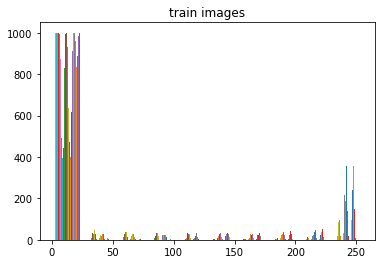

In [53]:
plt.title('train images')
plt.hist(train_images)
plt.show()

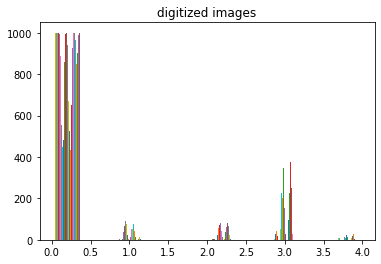

In [54]:
plt.title('digitized images')
plt.hist(train_digitized)
plt.show()

In [64]:
"""
EX 3
Calculați acuratețea pe mulțimea de testare a clasificatorul Multinomial Naive
Bayes, împărținând intervalul pixelilor în 5 sub-intervale.
OBS. Acuratețea pe care trebuie să o obțineți pentru num_bins = 5
este de 83.6%.
"""
# pt num_bins = 11 obtin 84.2%
from sklearn.naive_bayes import MultinomialNB # importare model
naive_bayes_model = MultinomialNB() # definire model
naive_bayes_model.fit(train_digitized, train_labels) # antrenare model
naive_bayes_model.predict(test_digitized) # prezicere etichete # array de 500 elemente in cazul acesta
naive_bayes_model.score(test_digitized, test_labels) # calculare acuratete # 83.6%

0.836

In [71]:
"""
EX 4
Testați clasificatorul Multinomial Naive Bayes pe subsetul MNIST
folosind 𝑛𝑢𝑚_𝑏𝑖𝑛𝑠 ∈ {3, 5, 7, 9, 11}
"""
num_bins = [3, 5, 7, 9, 11]
acc_list = []

for num_bin in num_bins:
    train_digitized = values_to_bins(train_images, num_bin)
    test_digitized = values_to_bins(test_images, num_bin)
    naive_bayes_model = MultinomialNB() # definire model
    naive_bayes_model.fit(train_digitized, train_labels) # antrenare model
    acc_list.append((num_bin, naive_bayes_model.score(test_digitized, test_labels))) # calculare acuratete
    
for num_bin, accuracy in acc_list:
    print('num_bin: ' + str(num_bin) + ', accuracy: ' + str(accuracy))

num_bin: 3, accuracy: 0.826
num_bin: 5, accuracy: 0.836
num_bin: 7, accuracy: 0.842
num_bin: 9, accuracy: 0.842
num_bin: 11, accuracy: 0.842


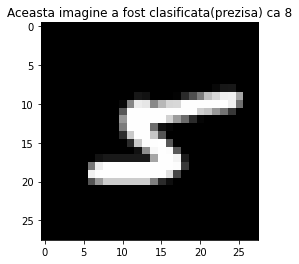

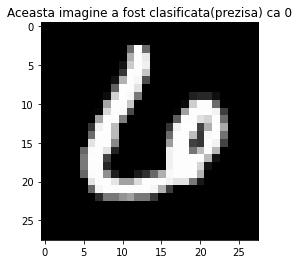

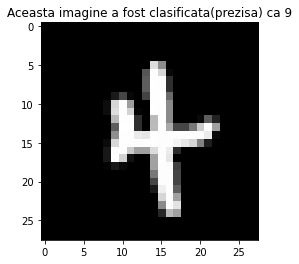

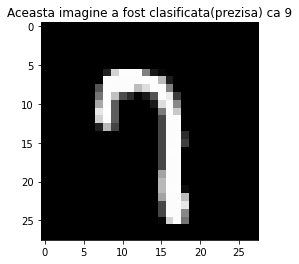

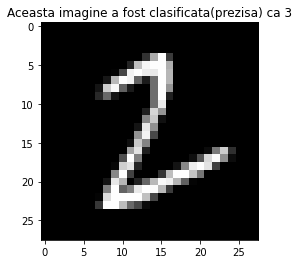

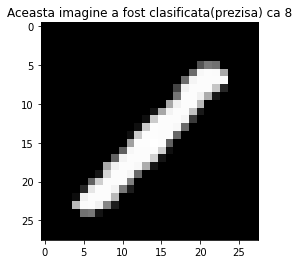

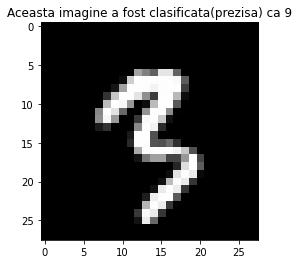

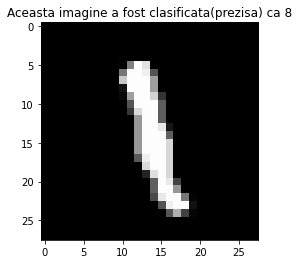

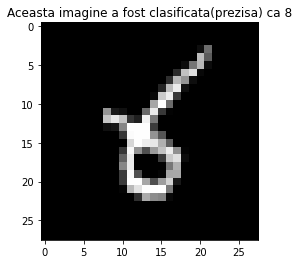

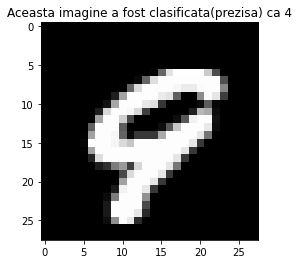

In [79]:
"""
EX 5
Folosind numărul de sub-intervale care obține cea mai bună acuratețe la
exercițiul anterior, afișați cel puțin 10 exemple misclasate"""

num_bin = 11 # numarul de sub-intervale cu cea mai buna acuratete

train_digitized = values_to_bins(train_images, num_bin)
test_digitized = values_to_bins(test_images, num_bin)

naive_bayes_model = MultinomialNB() # definire model
naive_bayes_model.fit(train_digitized, train_labels) # antrenare model
pred_labels = naive_bayes_model.predict(test_digitized) # prezicere etichete

# numpy.arghwere() # Find the indices of array elements that are non-zero, grouped by element
wrongs = np.argwhere(pred_labels != test_labels) # sunt misclasate unde difera pred_labels de test_labels
                                                 # in wrongs voi avea INDICII elementelor 
for index in wrongs[:10]: # afisare primele 10
    image = test_images[index] # imaginea cu pozitia index a fost misclasata
    image = np.reshape(image, (28, 28)) # redimensionăm vectorul de 1 x 784 la 28 x 28.

    plt.title("Aceasta imagine a fost clasificata(prezisa) ca " + str(pred_labels[index][0])) 
    plt.imshow(image.astype(np.uint8), cmap = 'gray') 
    plt.show()

In [87]:
"""EX 6
Definiți metoda confusion_matrix(y_true, y_pred) care calculează matricea de
confuzie. Calculați matricea de confuzie folosind predicțiile clasificatorului
anterior
Matrice de confuzie C = cij, numărul exemplelor din clasa i care au fost
clasificata ca fiind în clasa j. """

def confusion_matrix(y_true, y_pred):
    m = np.zeros((10, 10)) # 10 cifre (de la 0 la 9)
    for i, y in enumerate(y_pred): # i este indexul etichetetei, y este indexul din intervale??
        m[y_true[i]][y] += 1 # exemple din clasa i care au fost clasificate in clasa y
    return m

conf_mat = confusion_matrix(test_labels, pred_labels) # in test este clasa actuala(?)
print(*conf_mat, sep = '\n')

[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[ 0. 48.  0.  0.  0.  0.  1.  0.  3.  0.]
[ 2.  0. 51.  1.  1.  0.  0.  1.  1.  1.]
[ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
[ 0.  0.  0.  0. 34.  0.  0.  0.  2. 10.]
[ 1.  0.  0.  9.  0. 35.  1.  0.  5.  1.]
[ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
[ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
[ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
[ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]
